In [1]:
import sys
import os
import warnings
import numpy as np
import pickle
import tqdm
import matplotlib.pyplot as plt
from astropy.io import fits
from sklearn.neighbors import BallTree
warnings.filterwarnings('ignore')

def openAsImage(fname):        
    fits_image = fits.open(fname)[0].data
    return fits_image

def distance(true_coords_vector, coords_vector):
    true_coords = np.unique(true_coords_vector, axis=0)
    coords = np.unique(coords_vector, axis=0)
    tree_true_coords = BallTree(true_coords)
    tree_coords = BallTree(coords)
    distance_from_true_array, _ = tree_true_coords.query(coords)
    distance_from_found_array, _ = tree_coords.query(true_coords)
    distance_from_found = np.sum(distance_from_found_array)
    distance_from_true = np.sum(distance_from_true_array)
    return np.sum(distance_from_found_array) + np.sum(distance_from_true_array) 
    
def load_obj(name ):
    
    with open('/media/mariia/Maxtor/database5/results/' + name + '.pkl', 'rb') as f:
        return pickle.load(f, encoding='bytes')

distances = []
for i in tqdm.tqdm(os.listdir("/media/mariia/Maxtor/database5/results/")):
    d =load_obj(i[:-4])
    distances.append(distance(d[b'original_coords'], d[b'indexes']))
    
print(np.mean(distances))
print(np.std(distances))
plt.hist(distances, bins=100)
plt.show()


100%|██████████| 10214/10214 [32:08<00:00,  8.19it/s] 

1033.5739468193692
870.8683320301813


<Figure size 640x480 with 1 Axes>

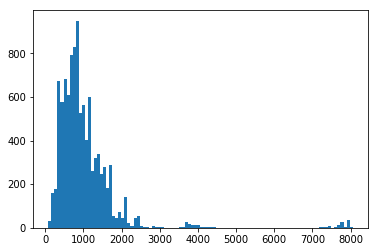

In [2]:
plt.hist(distances, bins=100)
plt.show()

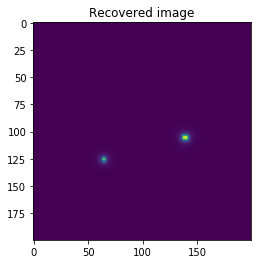

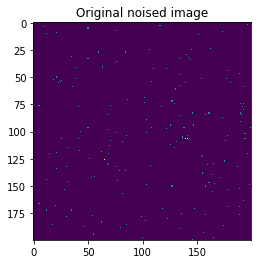

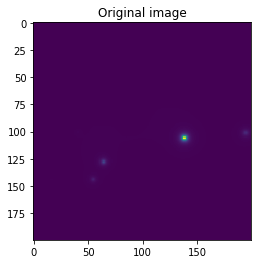

----------------------------------------


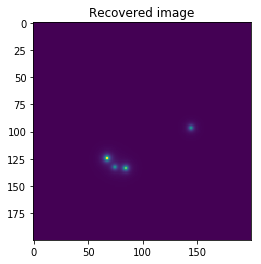

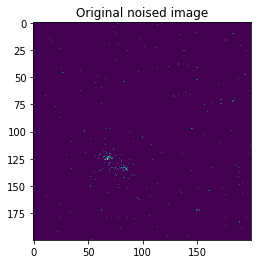

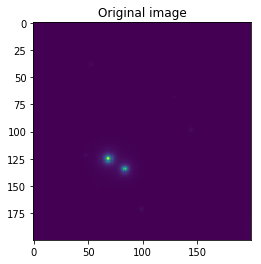

----------------------------------------


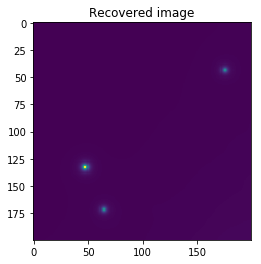

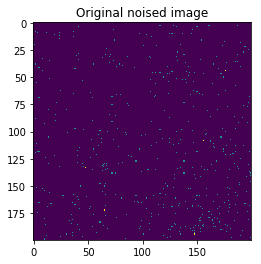

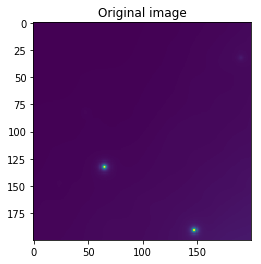

----------------------------------------


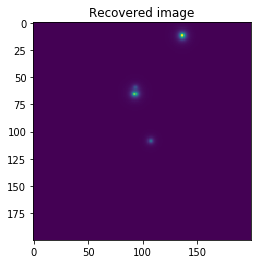

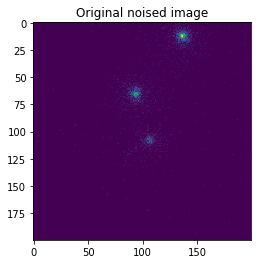

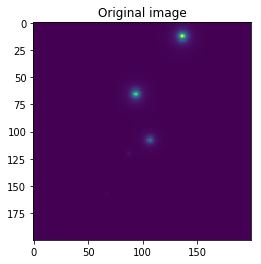

----------------------------------------


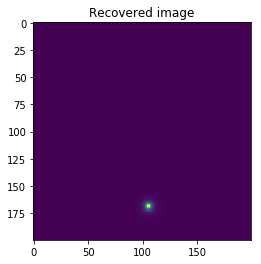

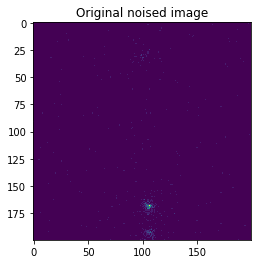

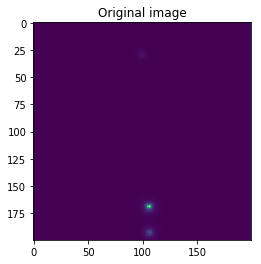

----------------------------------------


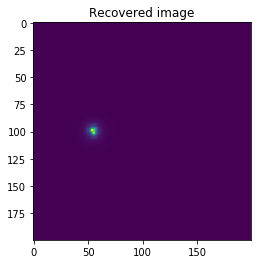

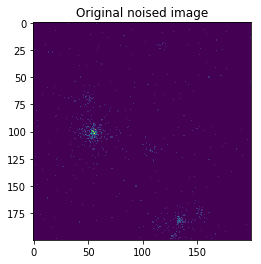

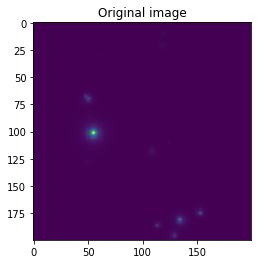

----------------------------------------


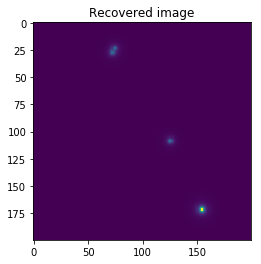

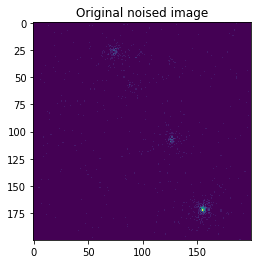

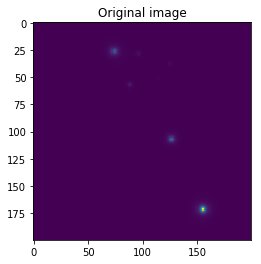

----------------------------------------


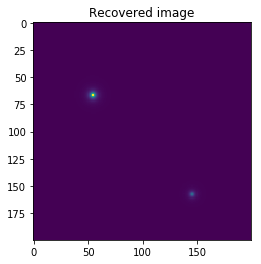

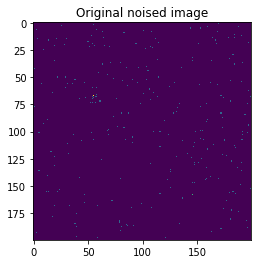

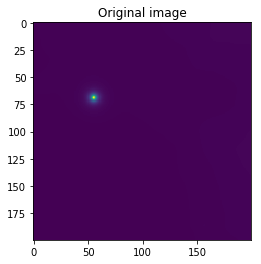

----------------------------------------


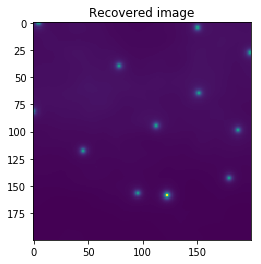

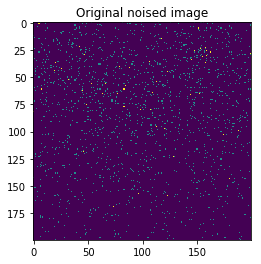

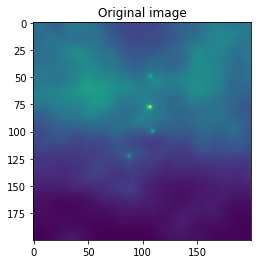

----------------------------------------


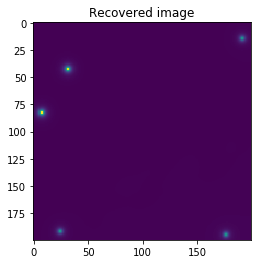

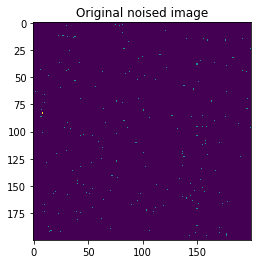

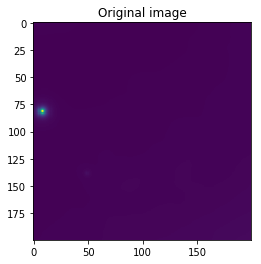

----------------------------------------


In [24]:
import random

def plot_d(d):
    plt.imshow(d[b'fin_fits'], cmap='viridis')
    plt.title("Recovered image")
    plt.show()
    plt.imshow(d[b'observations'], cmap='viridis')
    plt.title("Original noised image")
    plt.show()
    plt.imshow(d[b'original'], cmap='viridis')
    plt.title("Original image")
    plt.show()
    print("-"*40)
    #print(d[b'koefs'])
    #print('Recovered indexes: ' + str(d[b'indexes']))
    #print('Real indexes(no order): ' + str(np.array(d[b'original_coords']).astype(int)))
    
for i in range(10):
    name = random.choice(os.listdir("/media/mariia/Maxtor/database5/results/"))
    d =load_obj(name[:-4])
    plot_d(d)